In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
data = pd.read_csv('Breast_cancer.data',sep =",",header=None)
data.rename(columns={0:"id",1:'diagnosis',2:'radius_mean',3:'texture_mean',4:'perimeter_mean',5:'area_mean',6:'smoothness_mean',7:'compactness_mean',8:'concavity_mean',9:'concave points_mean',10:'symmetry_mean',11:'fractal_dimension_mean',12:'radius_se',13:'texture_se',14:'perimeter_se',15:'area_se',16:'smoothness_se',17:'compactness_se',18:'concavity_se',19:'concave points_se',20:'symmetry_se',21:'fractal_dimension_se',22:'radius_worst',23:'texture_worst',24:'perimeter_worst',25:'area_worst',26:'smoothness_worst',27:'compactness_worst',28:'concavity_worst',29:'concave points_worst',30:'symmetry_worst',31:'fractal_dimension_worst'},inplace=True)
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

In [2]:
data.replace({"B":0,"M":1},inplace=True)
data['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [3]:
x=data.iloc[:,2:32]
x=np.array((x))
y=np.array(data['diagnosis'])
print(np.shape(x))
print(np.shape(y))

(569, 30)
(569,)


In [4]:
data.head()

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

            ...             radius_worst  texture_worst  perimeter_worst  \
0           ...                    25.38          17.33           184.60   
1           ...                    24.99          23.41           158.80   
2           ...                    23.57          25.53           152.50   
3           ...                    14.91          26.50            98.87   
4           ...                    22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 32 columns]

### Split the data

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

### Scale the train data

In [8]:
(r,c)=np.shape(x_train)
print(r,c)
s=np.zeros((r,c))
for j in range(0,c):
    for i in range(0,r):
        s[i][j]=(x_train[i][j])/((max(x_train[:,j]))-(min(x_train[:,j])))
        
        #s[i][j]/100
print((max(x_train[:,j]))-(min(x_train[:,j])))

455 30
0.15245999999999998


### Principal Component Analysis

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=  2)
principalComponents = pca.fit_transform(s)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

principal component 1  principal component 2
0              -0.508624               0.166200
1              -0.394055               0.035758
2              -0.087966              -0.283852
3              -0.443348               0.018401
4              -0.426669              -0.175580

In [10]:
xp1 = np.array(principalDf["principal component 1"])
xp2 = np.array(principalDf["principal component 2"])
print(np.shape(xp1),np.shape(xp2))

(455,) (455,)


(1, 165) (1, 290)


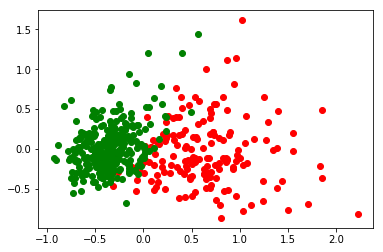

In [11]:
indp = np.where(y_train==1)
indn = np.where(y_train==0)
print(np.shape(indp),np.shape(indn))
plt.plot(xp1[indp],xp2[indp],"ro")
plt.plot(xp1[indn],xp2[indn],"go")
plt.show()


In [12]:
x0=np.ones((1,r))
x_train=np.array((xp1,xp2))
x_train=np.concatenate((x0,x_train))
x_train=np.transpose(x_train)
print(np.shape(x_train))

(455, 3)


### Gradient descent

In [13]:
(r,c)=np.shape(x_train)
theta=np.zeros((1,c))
iter=0
alpha=0.1
j_cost=[]
while iter<6000:
    cost=0
    dj=np.zeros((c,1))
    for i in range(0,r):
        for j in range(0,c):
            h=np.matmul(theta,x_train[i])
            sigm_h=1/(1+math.exp(-h))
            if (sigm_h)!=0 and (sigm_h)!=1:
                J=(1/r)*((-y_train[i]*math.log(sigm_h))-((1-y_train[i])*math.log(1-sigm_h)))
                cost=cost+J
            dj[j]=dj[j]+ (sigm_h-y_train[i])*x_train[i][j]
    for j in range(c):    
        theta[0][j]=theta[0][j]-alpha*(1/r)*(dj[j])
    j_cost.append(J)
    iter=iter+1
print(theta)
print(j_cost[-1])

[[-0.706419    9.27893278 -3.36546875]]
0.0001402251220165794


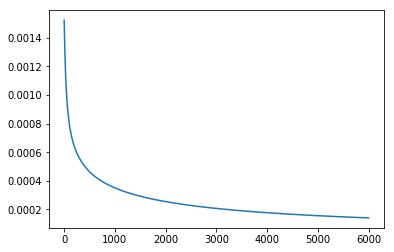

In [14]:
plt.plot(j_cost)

In [15]:
ytemp = np.matmul(theta,np.transpose(x_train))
yhat = np.zeros(np.size(ytemp))
for i in range(r):
    if ytemp[0,i] >0.5:
        yhat[i] = 1
print(yhat)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1.

In [16]:
train_error = abs(np.sum(yhat - y_train)/len(y_train))
accuracy = (1-train_error) * 100
print("Accuracy is",accuracy)

Accuracy is 95.6043956043956


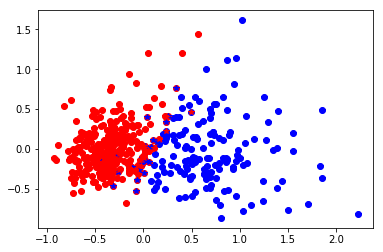

In [17]:
ipos = np.where(yhat==1)
ineg = np.where(yhat==0)
plt.plot(xp1[ipos],xp2[ipos],"bo")
plt.plot(xp1[ineg],xp2[ineg],"ro")
plt.plot(xp1[indp],xp2[indp],"b*")
plt.plot(xp1[indn],xp2[indn],"r*")
plt.show()

### Scaling the test data

In [18]:
(r,c)=np.shape(x_test)
print(r,c)
stest=np.zeros((r,c))
for j in range(0,c):
    for i in range(0,r):
        stest[i][j]=(x_test[i][j])/((max(x_test[:,j]))-(min(x_test[:,j])))
        
        #s[i][j]/100
print((max(x_test[:,j]))-(min(x_test[:,j])))

114 30
0.08445


### PCA for test data

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=  2)
principalComponents = pca.fit_transform(stest)
principalDftest = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDftest.head()

principal component 1  principal component 2
0               0.329974               0.473271
1              -0.584564              -0.319024
2              -0.614218              -0.423898
3              -0.504843              -0.439621
4              -0.773226              -0.385015

In [21]:
xp1test = np.array(principalDftest["principal component 1"])
xp2test = np.array(principalDftest["principal component 2"])
print(np.shape(xp1test),np.shape(xp2test))

(114,) (114,)


In [22]:
x0=np.ones((1,r))
x_test=np.array((xp1test,xp2test))
x_test=np.concatenate((x0,x_test))
x_test=np.transpose(x_test)
print(np.shape(x_test))

(114, 3)


### Test error

In [24]:
print(np.shape(theta),np.shape(x_test))
ytest = np.matmul(theta,np.transpose(x_test))
yhat_test = np.zeros(np.size(ytest))
for i in range(r):
    if ytest[0,i] >0.5:
        yhat_test[i] = 1
print(yhat_test)
np.shape(x_test)

(1, 3) (114, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0.]


(114, 3)

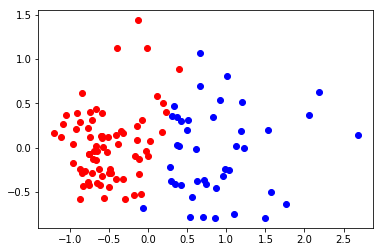

In [25]:
ipos_test = np.where(yhat_test==1)
ineg_test = np.where(yhat_test==0)
plt.plot(xp1test[ipos_test],xp2test[ipos_test],"bo")
plt.plot(xp1test[ineg_test],xp2test[ineg_test],"ro")
plt.show()

In [ ]:
test_error = abs(np.sum(yhat_test - y_test)/len(y_test))
accuracy_test = (1-test_error) * 100
print("Accuracy is",accuracy_test)